### Жарова Мария
#### группа Б05-903

### Метод Ньютона

Задание

1. ответить на все вопросы в скрипте
2. изменить код метода Ньютона так, чтобы он смог разрешать все проблемные случаи, возникающие в скрипте, продемонстрировать это, объяснить почему модификация решает проблему. Проблемы - нулевая производная, кратные корни, биения. Для кратных корней надо так модифицировать метод, чтобы порядок оставался вторым и продемонстрировать это.

ВАЖНО! Модифицированный метод Ньютона должен получаться путем добавления новых строчек в simple_newton, а не переписыванием его с нуля. Новые строчки надо прокомментировать, зачем они были добавлены.

In [71]:
# простая реализация Метода Ньютона
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np

def simple_newton(func, dfunc, x, tol = 1e-12):
    sol = 0
    iteration = 0
    dxs = []
    for i in range(30):
        iteration += 1
        dx = -func(x)/dfunc(x)
        dxs.append(abs(dx))
        x = x + dx
        if abs(dx) < tol:
            sol = x
            return [sol, iteration, dxs]
    sol = float('nan')
    print('More then 30 iterations!')
    return [sol, iteration]

In [85]:
# модифицированная реализация Метода Ньютона
# проблему кратных корней решаем с помощью добавления аргумента n в функцию (кратность корня, заранее известна)
# проблему нулевой производной решаем с помощью замены нуля на 0.00005 (аналог бесконечно малого значения)
def modified_newton(func, dfunc, x, n = 1, tol = 1e-12):
    sol = 0
    iteration = 0
    dxs = []
    for i in range(30):
        if dfunc(x) == 0:
            dx = -func(x)/0.002  # нулевая производная
        else:
            dx = -func(x)/dfunc(x)
        dx = n*dx # кратный корень
        iteration += 1
        dxs.append(dx)
        x = x + dx
        if abs(dx) < tol:
            sol = x
            return [sol, iteration, dxs]
    sol = float('nan')
    print('More then 30 iterations!')
    return [sol, iteration]

#### Нелинейное уравнение 1

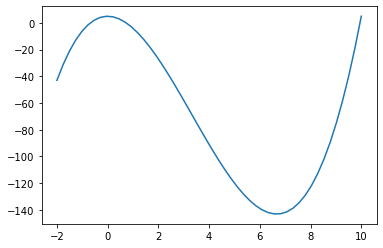

In [74]:
x = np.linspace(-2,10)
func0 = lambda x: x**3 - 10*x**2 + 5
dfunc0 = lambda x: 3*x**2 - 20*x
y = func0(x)
plt.plot(x, y)

1. Объяснить, почему различаются результаты в случае 1 и 2
2. Объяснить, что происходит в случае 3
3. Построить график порядка сходимости от номера итерации. Объяснить результат

In [91]:
data1 = simple_newton(func0, dfunc0, 8) # случай 1
data2 = simple_newton(func0, dfunc0, 0.7) # случай 2
#data3 = simple_newton(func0, dfunc0, 0.0) # случай 3 -- не работает
print('sol1 = ', data1[0])
print('iter1 = ', data1[1])
print('sol2 = ', data2[0])
print('iter2 = ', data2[1])

sol1 =  9.949491057914388
iter1 =  7
sol2 =  0.7346035077893033
iter2 =  4


1). Оба полученные значения являются корнями уравнения $x^3 + 10x^2 +5 = 0$, также известно, что метод Ньютона находит ближайший корень относительно начального приближения. Тогда в первом случае, взяв за начальное приближение $x_0 = 8$, более близким будет корень $sol1$, по направлению к которому мы и будем двигаться (на каждом шаге $dx>0$); а во втором случае ближайшим корнем окажется значение $sol2$, к которому также, соответственно, метод Ньютона будет продвгаться ($dx<0$).


2). В третьем случае возникает упомянутая ранее проблема "нулевой производной" - значение производной функции уже в точке начального приближения $(x^3 + 10x^2 +5)^{'}|_{x=0} = (2x + 20x)|_{x=0}=0$ - равняется нулю $\Rightarrow$ немодифицированный код функции $simple_newton$ не может быть выполнен без возникновения ошибки деления на ноль.


3). Строим графики:

<ipython-input-90-ced0c9ece95e>:6: RuntimeWarning: divide by zero encountered in log
  P.append((np.log(abs(x_0 + i - data1[0]))) / (np.log(abs(x_0 - data1[0]))))


Text(0, 0.5, 'порядок сходимости')

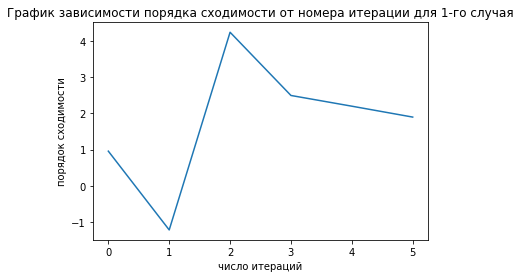

In [90]:
# для случая 1
data1 = modified_newton(func0, dfunc0, 8)
x_0 = 8
X = [i for i in range(len(data1[2]))]
P = []
for i in (data1[2]):
    P.append((np.log(abs(x_0 + i - data1[0]))) / (np.log(abs(x_0 - data1[0]))))
    x_0 += i
    
plt.plot(X, P)     
plt.title('График зависимости порядка сходимости от номера итерации для 1-го случая')
plt.xlabel('число итераций')
plt.ylabel('порядок сходимости')

В начале значения стабилизируются, далее порядок сходимости стремиться к двум согласно теории.

<ipython-input-88-b3d462e7cd15>:6: RuntimeWarning: divide by zero encountered in log
  P.append((np.log(abs(x_0 + i - data2[0]))) / (np.log(abs(x_0 - data2[0]))))


Text(0, 0.5, 'порядок сходимости')

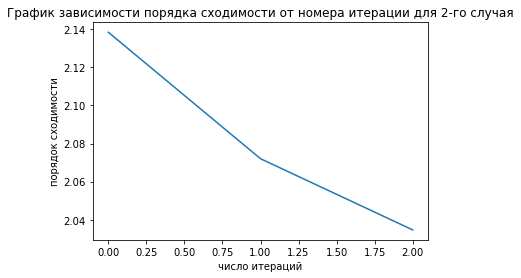

In [88]:
# для случая 2
data2 = modified_newton(func0, dfunc0, 0.7)
x_0 = 0.7
X = [i for i in range(len(data2[2]))]
P = []
for i in (data2[2]):
    P.append((np.log(abs(x_0 + i - data2[0]))) / (np.log(abs(x_0 - data2[0]))))
    x_0 += i
    
plt.plot(X, P) 
plt.title('График зависимости порядка сходимости от номера итерации для 2-го случая')
plt.xlabel('число итераций')
plt.ylabel('порядок сходимости')

Порядок сходимости сходится к двум согласно теории.

<ipython-input-86-191ab33c6797>:7: RuntimeWarning: divide by zero encountered in log
  P.append((np.log(abs(x_0 + i - data3[0]))) / (np.log(abs(x_0 - data3[0]))))


Text(0, 0.5, 'порядок сходимости')

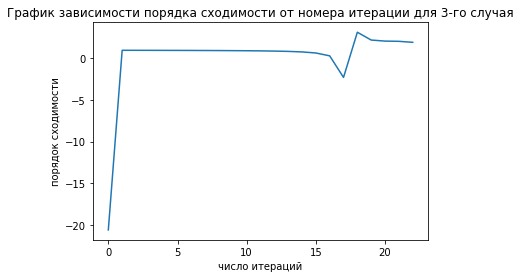

In [86]:
# для случая 3
data3 = modified_newton(func0, dfunc0, 0.0)
x_0 = 0.0
X = [i for i in range(len(data3[2]))]
P = []
for i in (data3[2]):
    P.append((np.log(abs(x_0 + i - data3[0]))) / (np.log(abs(x_0 - data3[0]))))
    x_0 += i  

plt.plot(X, P) 
plt.title('График зависимости порядка сходимости от номера итерации для 3-го случая')
plt.xlabel('число итераций')
plt.ylabel('порядок сходимости')

Cкачки в начале могут возникать из-за нулевой производной, далее идёт плато с порядком сходимости два. Следующий скачок опять связан с обращением в ноль производной, и снова порядок сходимости равен двум.

#### Нелинейное уравнение 2

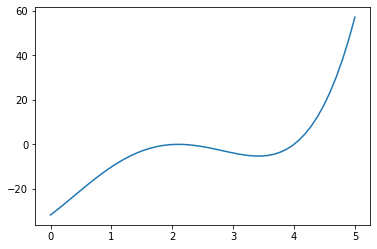

In [4]:
x = np.linspace(0,5)
func1 = lambda x: x**4 - 6.4*x**3 + 6.45*x**2 + 20.538*x - 31.752 #double root
dfunc1 = lambda x: 4.0*x**3 - 19.2*x**2 + 12.9*x + 20.538
y = func1(x)
plt.plot(x, y)

1. Построить график порядка сходимости от номера итерации. Объяснить результат

In [62]:
data = modified_newton(func1, dfunc1, 2.0, n=2)
print('sol = ', data[0])
print('iter = ', data[1])

sol =  2.100000000014807
iter =  6


Text(0, 0.5, 'порядок сходимости')

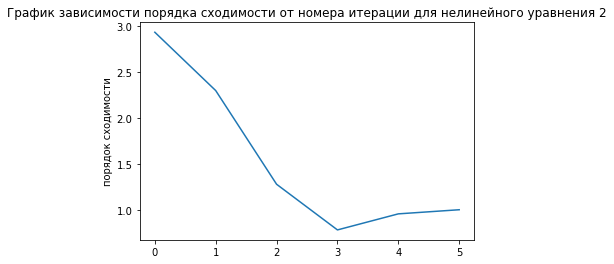

In [63]:
x_0 = 2.0
X = [i for i in range(len(data[2]))]
P = []
for i in (data[2]):
    P.append((np.log(abs(x_0 + i - data[0]))) / (np.log(abs(x_0 - data[0]))))
    x_0 += i  

plt.plot(X, P) 
plt.title('График зависимости порядка сходимости от номера итерации для нелинейного уравнения 2')
plt.ylabel('порядок сходимости')

#### Нелинейное уравнение 3

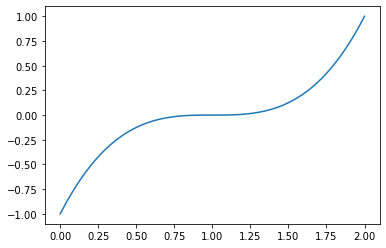

In [16]:
x = np.linspace(0,2)
func2 = lambda x: (x-1)**3
dfunc2 = lambda x: 3*(x-1)**2
y = func2(x)
plt.plot(x, y)

1. Подобрать начальное приближение и решить задачу

In [26]:
data = simple_newton_1(func2, dfunc2, 0.5, m = 3)
print('sol = ', data[0])
print('iter = ', data[1])

sol =  1.0
iter =  2


Используем для нахождения начального приближения достаточное условие сходимости метода Ньютона:

Для начала найдём отрезок $[a;b]$, на котором будем искать начальное приближение $x_0$: $a$ и $b$ должны быть такими, что $f(a)f(b)<0\Rightarrow$ подойдёт $a=0,\; b=1.1.$

Также должно выполниться условие, что $f^{'}$ и $f^{''}$ знакопостоянны на $[a;b]$ ($f^{'} = 3(x-1)^2$ и $^{''} = 6(x-1)$) - тоже выполняется на нашем отрезке.

Тогда можем выбрать $x_0\in [a;b]$ (например, $x=0.5$): выполняется условие $f(x_0)f^{''}(x_0)>0$.

#### Нелинейное уравнение 4

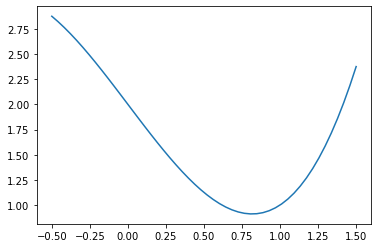

In [8]:
x = np.linspace(-0.5,1.5)
#x = np.linspace(-5,5)
func3 = lambda x: x**3 - 2*x + 2
dfunc3 = lambda x: 3*x**2 - 2
y = func3(x)
plt.plot(x, y)

1. Почему не находится решение во втором случае?

In [9]:
data = simple_newton(func3, dfunc3, 0.5) # случай 1
data = simple_newton(func3, dfunc3, 0) # случай 2
print('sol = ', data[0])
print('iter = ', data[1])

More then 30 iterations!
sol =  nan
iter =  30


Решение не находится из-за того, что присутствуют биения.